# Encontrando puntos alineados

## Codificación

En esta ocasión utilizaremos la librería *pyplot* de *matplotlib* para realizar las gráficas donde visualizaremos los puntos que generaremos y las rectas que encontremos. Para generar puntos aleatorios utilizaremos la librería *numpy*.


In [262]:
from matplotlib import pyplot as plt
import numpy as np
import time
plt.rcParams["figure.figsize"] = (7,7)

### Sorteando los puntos

Generamos una lista con todas las coordenadas X de los puntos y otra para las coordenadas Y. 

Opcionalmente, creamos una lista de valores para asignar un color a cada punto. En este caso utilizaremos la suma de coordenadas para más adelante mapear estos valores con los colores codificados en modo HSV. De esta forma obtenemos un efecto "arcoiris" en la visualización.

In [269]:
n_points = 50  # Number of points

# Creating a random set of points
x_values = [np.random.randint(100) for i in range(n_points)]
y_values = [np.random.randint(100) for i in range(n_points)]
colors = [x_values[i] + y_values[i] for i in range(n_points)]

Visualizamos los puntos para comprobar que se han creado correctamente.

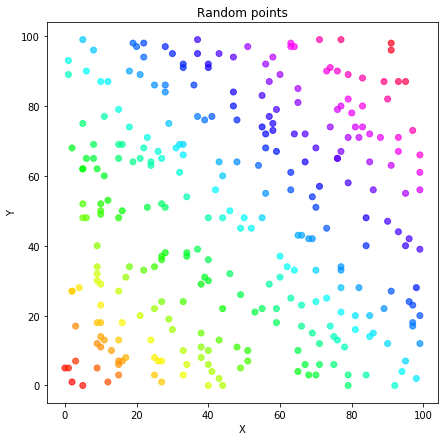

In [270]:
# Plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random points')
_ = plt.scatter(x_values, y_values, c=colors, cmap='hsv', alpha=0.7)
plt.show()

## Método 1: Área del triángulo

In [271]:
def colinear_1(x_values, y_values):
    size = len(x_values)
    x_segments = []
    y_segments = []
    for i in range(size):
        x1, y1 = x_values[i], y_values[i]
        for j in range(size):
            if i == j:
                continue
            x2, y2 = x_values[j], y_values[j]
            for k in range(size):
                if i == k or j == k:
                    continue
                x3, y3 = x_values[k], y_values[k]
                if x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2) == 0:
                    x_segments += [x1, x2, x1, x3]
                    y_segments += [y1, y2, y1, y3]
    return x_segments, y_segments

Total time: 14.080467939376831 seconds


KeyboardInterrupt: 

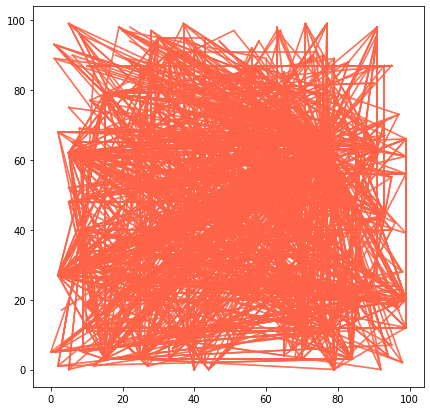

In [272]:
start = time.time()
x, y = colinear_1(x_values, y_values)
end = time.time()
print("Total time: {} seconds".format(end - start))

# Showing the results
for i in range(0, len(x), 2):
    _ = plt.plot(x[i:i + 2], y[i:i + 2], c='Tomato', alpha=0.7)
_ = plt.scatter(x_values, y_values, c=colors, cmap='hsv', alpha=0.7)
plt.show()

### Método 2: Agrupar por ángulo

In [227]:
def angle(p1, p2, q1, q2):
    if q1 == p1:
        return np.pi / 2
    d1 = abs(p1 - q1)
    d2 = abs(p2 - q2)
    angle = np.arctan2(d2, d1)
    return angle if p1 < q1 and p2 < q2 or p1 > q1 and p2 > q2 else -angle

In [228]:
def group_by_angle(angles, p):
    colinear = [[angles[0]]]
    count = 0
    for angle in angles[1:]:
        if angle[1] == colinear[count][0][1]:
            colinear[count].append(angle)
        else:
            colinear.append([angle])
            count += 1
    colinear = [[c[0] for c in line] for line in colinear if len(line) > 1]
    x_values, y_values = [], []
    for line in colinear:
        for point in line:
            x_values += [p[0], point[0]]
            y_values += [p[1], point[1]]

    return x_values, y_values

In [229]:
# http://www.cs.princeton.edu/courses/archive/spring03/cs226/assignments/lines.html
def colinear_2(x_values, y_values):
    size = len(x_values)
    x_coord, y_coord = [], []
    for i in range(size):
        p_angles = []
        x_p, y_p = x_values[i], y_values[i]
        for j in range(size):
            if i == j:
                continue
            x_q, y_q = x_values[j], y_values[j]
            p_angles.append([(x_q, y_q), angle(x_p, y_p, x_q, y_q)])
        # Ordenando la lista por angulo
        p_angles = sorted(p_angles, key=lambda x: x[1])
        x, y = group_by_angle(p_angles, (x_p, y_p))
        x_coord += x
        y_coord += y
    return x_coord, y_coord

Total time: 0.49376893043518066 seconds


KeyboardInterrupt: 

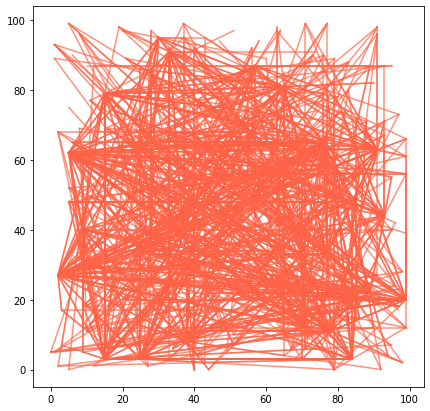

In [273]:
start = time.time()
x, y = colinear_2(x_values, y_values)
end = time.time()
print("Total time: {} seconds".format(end - start))

# Showing the results
for i in range(0, len(x), 2):
    _ = plt.plot(x[i:i + 2], y[i:i + 2], c='Tomato', alpha=0.7)
_ = plt.scatter(x_values, y_values, c=colors, cmap='hsv', alpha=0.7)
plt.show()